# Lead Scoring case study

## Step 1 - Reading and inspecting the dataset

In [1]:
# Importing required libraries

import numpy as np, pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# Reading the csv file

lead=pd.read_csv('leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the dimension of the data

lead.shape

(9240, 37)

In [4]:
# Info of the dataset

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Statastical summary of the dataset

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2- Quality and cleaning of the dataset

In [6]:
# Let's check the datatypes of the columns

lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

## Observations

#### There are 7 numeric and 30 categorical columns in this dataset.
#### Also none of the columns have inconsistent datatype, hence no conversion is required

In [7]:
# Checking for duplicates and dropping the entire duplicate row if any

lead.drop_duplicates(subset=None, inplace=True)

In [8]:
# Checking shape after dropping duplicate

lead.shape

(9240, 37)

### No duplicates in dataset

In [9]:
# Checking nulls in data

lead.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [10]:
# Checking the percentage of null values

percent_missing=round(100*(lead.isnull().sum()/len(lead)),2).sort_values(ascending=False)
print(percent_missing)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### There are some categorical columns where level called 'Select' is there, Let's handle that
#### Finding in which columns having the select 

In [11]:
cols=list(lead.columns)
for i in cols:
    if 'Select' in lead[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [12]:
# Let's convert the "Select" values to NaN

lead['Specialization'] = lead['Specialization'].replace('Select', np.nan)
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace('Select', np.nan)
lead['Lead Profile'] = lead['Lead Profile'].replace('Select', np.nan)
lead['City'] = lead['City'].replace('Select', np.nan)

In [13]:
# Now again checking the percentage of missing values

percent_missing = round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)
print(percent_missing)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [14]:
# Let's see the columns that have more than 30% null values

missing_columns_30 = lead.columns[100*(lead.isnull().sum()/len(lead)) > 30]
print(missing_columns_30)

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [15]:
# Let's drop the columns where the missing values are more then 30%

lead= lead.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)


In [16]:
# Now let's check the remaining percentage of null values after dropping

percent_missing = round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)
print(percent_missing)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

### Now we can see there are missing values < 30%, let's measure whether to compute these columns nulls or not

In [17]:
lead.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:
# let's check the percentage of India as value in the country column

country_percentage = round(100*len(lead[lead['Country'] == 'India'])/len(lead['Country']),2)
print(country_percentage)

70.26


#### Here India occurs around 70% of times in the Country column, and country column itself has around 27% as missing values.


In [19]:
# Its better to drop the country column

lead = lead.drop(['Country'], axis=1)


In [20]:
lead.shape

(9240, 26)

In [21]:
# Now let's check the value counts for column Lead Source

lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [22]:
# Here we can noticed that Google appears twice with different cases. Hence we shall convert all rows with same case
# Also since "Google" has the major chunk of data, we can impute the null values with Google

lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')

In [23]:
# Check the value counts for Total Visits column

lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [24]:
# Check the median of column 

lead['TotalVisits'].median()

3.0

In [25]:
# We can impute the null values in TotalVisits by the median value

lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan, lead['TotalVisits'].median())

In [26]:
# Checking again nulls in data

lead.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Page Views Per Visit                              137
Last Activity                                     103
Prospect ID                                         0
Newspaper Article                                   0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Search                                              0
Magazine                                            0
Lead Number                                         0
Total Time Spent on Website 

In [27]:
# Check the value counts for Page Views Per Visit

lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [28]:
# Check the median of the column

lead['Page Views Per Visit'].median()

2.0

In [29]:
# We can impute the null values in 'Page Views Per Visit' by the median value which

lead['Page Views Per Visit'] = lead['Page Views Per Visit'].replace(np.nan, lead['Page Views Per Visit'].median())

In [30]:
# Checking nulls again

lead.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Last Activity                                     103
Prospect ID                                         0
Newspaper Article                                   0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Search                                              0
Magazine                                            0
Lead Number                                         0
Page Views Per Visit                                0
Total Time Spent on Website 

In [31]:
# Check the value counts for the column Last Activity

lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
# Now here, since we do not have any information of what the last activity of the customer would have been, we can add a new category 'Not Sure'

lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Not Sure')

In [33]:
# Check the value counts for the column "What is your current Occupation"

lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
# Since no information has been provided for Current Occupation, we can add new category "No Information" for nulls

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'No Information')

In [35]:
# Now let's check the value counts for the column What matters most to you in choosing a course 

lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
matters_most_percent= round(100*len(lead[lead['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(lead['What matters most to you in choosing a course']),2)
print(matters_most_percent)

70.65


#### Since "Better Career Prospects" occurs around 70% times in the "What matters most to you in choosing a course" column,also same has 29% nulls


In [37]:
# Its better drop this column

lead = lead.drop(['What matters most to you in choosing a course'], axis=1)

In [38]:
# Now since all the nulls are hadldled, to verify, lets check the total missing value once again

lead.isnull().sum().sort_values(ascending=False)


Prospect ID                                 0
Magazine                                    0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Search                                      0
Lead Number                                 0
What is your current occupation             0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                                   0
Do Not Call                                 0
Do Not Email                      

### After reading the data, found that the following columns have only one value "No" in all the rows.
### we can eliminate those coulumn with no value

#### 1. Magazine
#### 2. Receive More Updates About Our Courses
#### 3. Update me on Supply Chain Content
#### 4. Get updates on DM Content
#### 5. I agree to pay the amount through cheque
#### 6. Newspaper Article
#### 7. X Education Forums



In [39]:
# Let's drop these unneccesary columns

lead = lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque','Newspaper Article','X Education Forums'], axis=1)

In [40]:
lead.shape

(9240, 18)

## Outliers

In [41]:
# Checking outliers at 25%,50%,75%,90%,95% and above

lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


### We can see the outliers exists in these two columns TotalVisits and Page Views Per Visit.

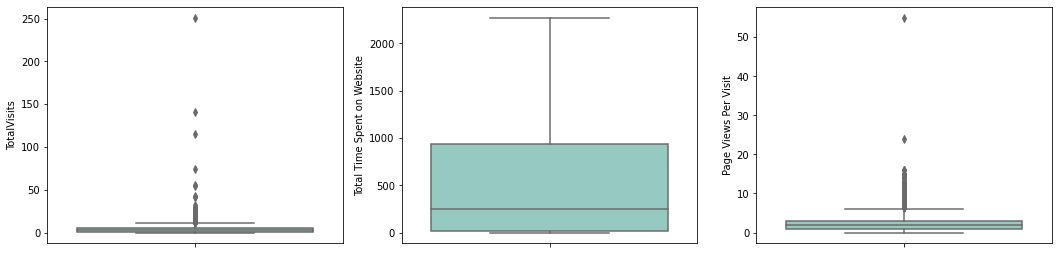

In [42]:
# Let's check the outliers in all numeric columns

plt.figure(figsize=(18, 20))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = lead)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = lead)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = lead)
plt.show()


In [43]:
# we can remove the values beyond 99% for Total Visits column

nn_quartile_total_visits = lead['TotalVisits'].quantile(0.99)
lead= lead[lead["TotalVisits"] < nn_quartile_total_visits]
lead["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and above

lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [45]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead["Page Views Per Visit"] < nn_quartile_page_visits]
lead["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [46]:
# Checking outliers at 25%,50%,75%,90%,95% and above

lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [47]:
 # Checking the percent of the remained data

num_data = round(100*(len(lead)/9240),2)
print(num_data) 



97.72


### Here at this stage we can say that our data is cleaned and approax 98% of data retained

## Step 3 - Data Analysis

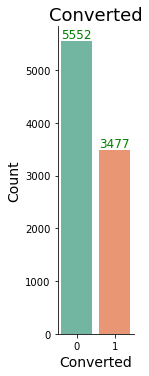

In [48]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=lead, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 18)
plt.xlabel("Converted", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='green', ha='center', va='bottom')
    
plt.show()

In [49]:
# Finding out conversion rate

Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

38.50924797873519

### Here we can see that the conversion rate is around 39%

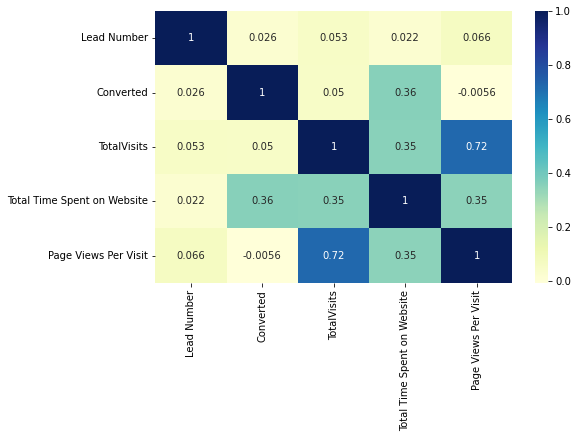

In [50]:
#Checking correlations of numeric values using heatmap

# Size of the figure

plt.figure(figsize=(8,5))

# heatmap
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

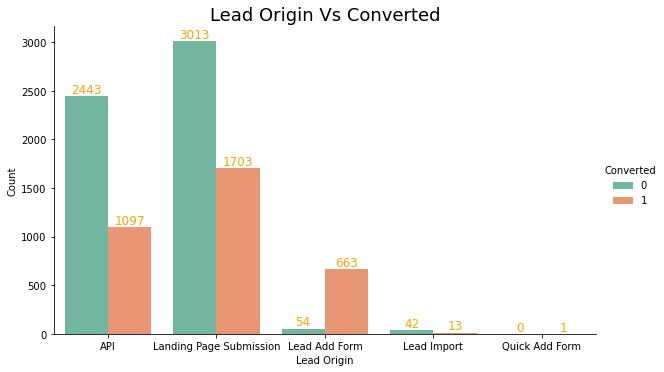

In [51]:
# Lead Origin vs converted

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 18)
plt.xlabel("Lead Origin", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='orange', ha='center', va='bottom')
    
plt.show()

### From above figure we can say that the maximum conversion happened from "Landing Page Submission". Also there was only one request from "Quick add form" which got converted.

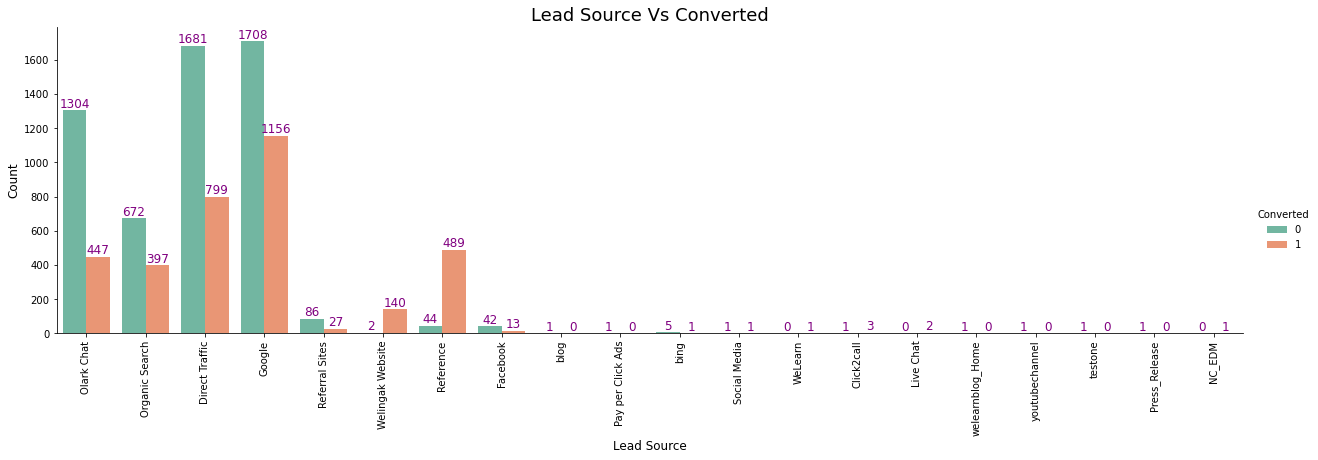

In [52]:
# Lead Source vs converted

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 18)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='purple', ha='center', va='bottom')
   
plt.show()

### From the above figure, we can say that the major conversion in the lead source is from "google"

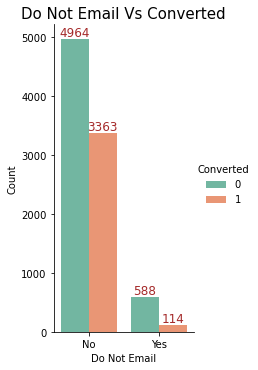

In [53]:
# Do not Email vs converted

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 15)
plt.xlabel("Do Not Email", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='brown', ha='center', va='bottom')

plt.show()

### Based on the above graph, major conversion has happend from the emails that have been sent

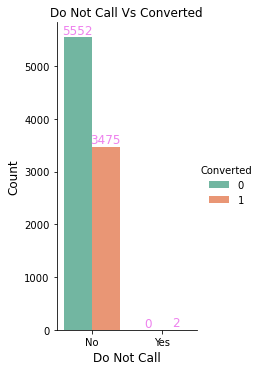

In [54]:
# Do not Call vs converted

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 12)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='violet', ha='center', va='bottom')

plt.show()

### Here we can observe that major conversions happened when calls were made. However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted. :)

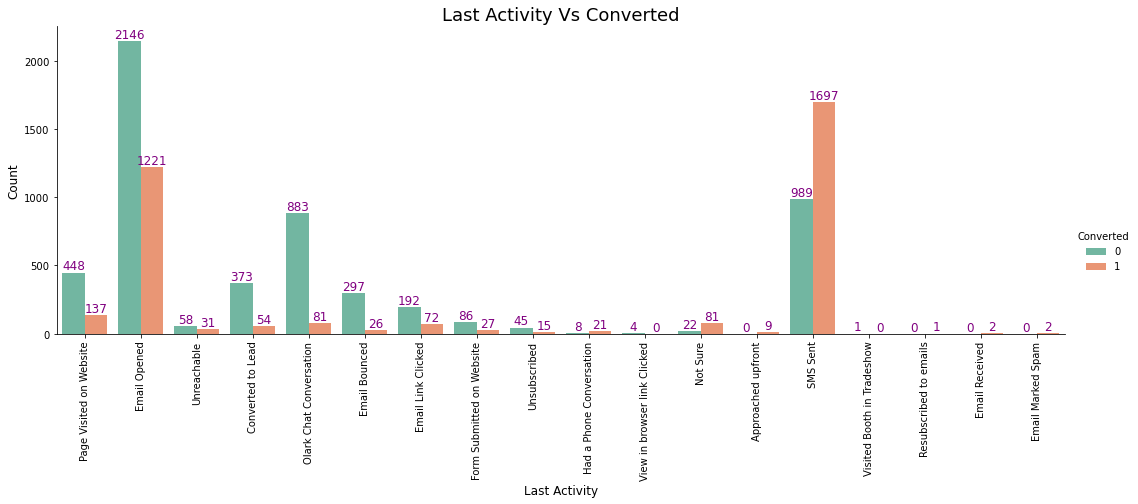

In [55]:
# Last Activity vs converted

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 18)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='purple', ha='center', va='bottom')

plt.show()

#### As per the above graph, last activity value of 'SMS Sent' had more conversion

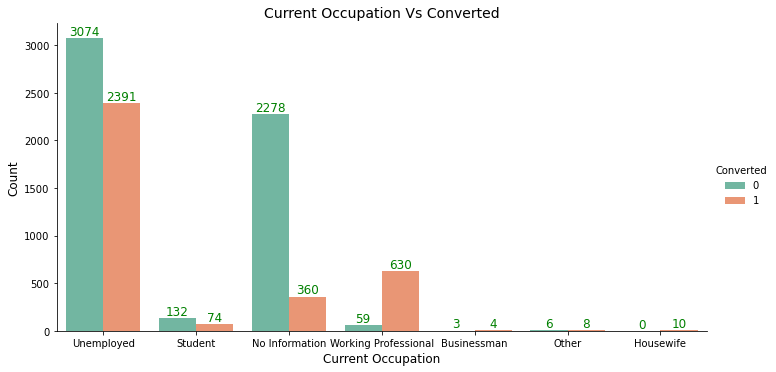

In [56]:
# What is your current occupation vs converted

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='green', ha='center', va='bottom')

plt.show()

#### More conversion happend with people who are unemployed. It can also be noticed from the above data that - Out of 7 business men, 4 got converted - Out 10 housewives, all 10 leads got converted.

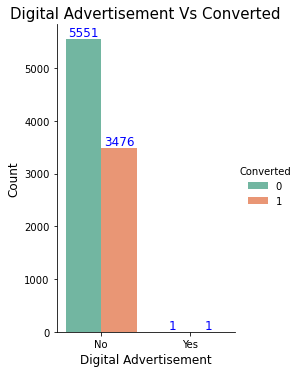

In [57]:
# Digital Advertisement vs converted

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 15)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

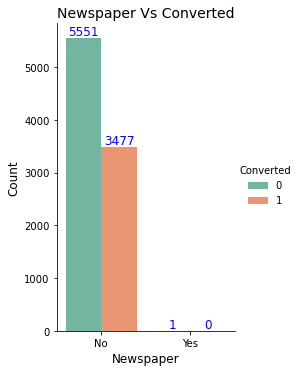

In [58]:
# Newspaper vs converted

plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [59]:
# Dropping Newspaper column

lead = lead.drop(['Newspaper'], axis=1)

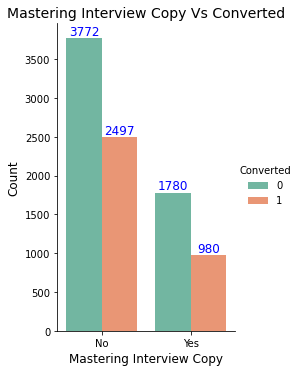

In [60]:
# A free copy of Mastering The Interview vs converted

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### Conversion rate is high on leads who do not want a free copy of Mastering Interviews

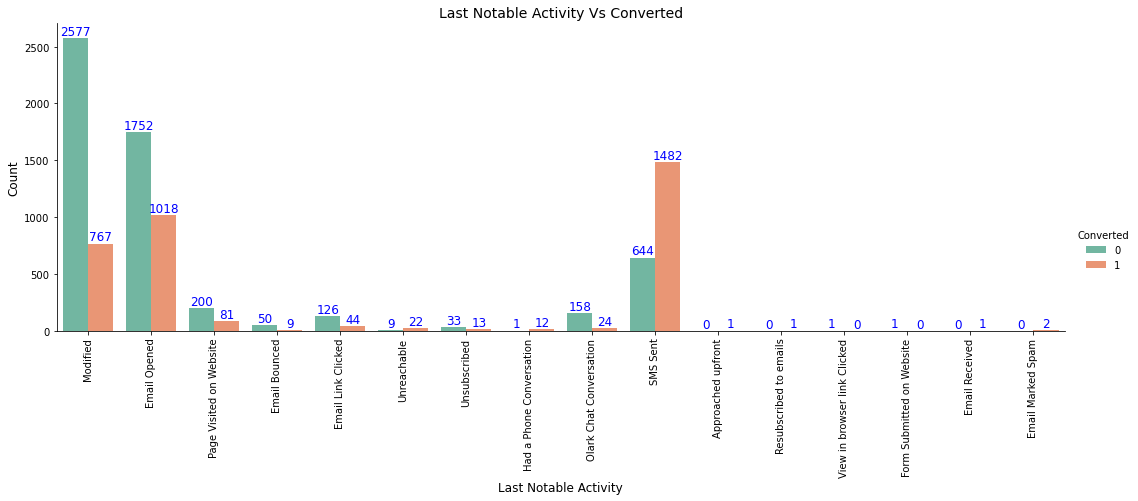

In [61]:
# Last Notable Activity vs converted

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()


#### It can be noticed that the conversion rate is high for "SMS Sent"

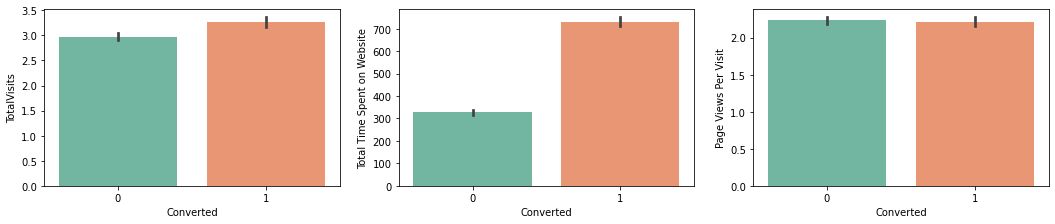

In [62]:
# Now check the conversions for all numeric values

plt.figure(figsize=(18,15))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = lead)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = lead)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = lead)
plt.show()

#### The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

## Step 4 - Data Preparation

#### Converting some binary variables Yes/No to 0/1

In [63]:
var =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
lead[var] = lead[var].apply(binary_map)

In [64]:
# Creating dummies 

# Lead Origin

d_lead_origin = pd.get_dummies(lead['Lead Origin'], prefix='LeadOrigin')

# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)

#Adding the results to the master dataframe
lead = pd.concat([lead, d_lead_origin1], axis = 1)

# Lead Source 
d_lead_source = pd.get_dummies(lead['Lead Source'], prefix='LeadSource')

# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)

# Adding the results to the master dataframe
lead = pd.concat([lead,d_lead_source1], axis=1)

# last Activity
d_last_activity = pd.get_dummies(lead['Last Activity'], prefix='LastActivity')

# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)

# Adding the results to the master dataframe
lead = pd.concat([lead,d_last_activity1], axis=1)

# What is your current occupation
d_curr_occupation = pd.get_dummies(lead['What is your current occupation'], prefix='CurrentOccupation')

# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)

# Adding the results to the master dataframe
lead = pd.concat([lead,d_curr_occupation1], axis=1)

# Last Notable Activity
d_last_notable_activity = pd.get_dummies(lead['Last Notable Activity'], prefix='LastNotableActivity')

# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)

# Adding the results to the master dataframe
lead = pd.concat([lead,d_last_notable_activity1], axis=1)

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
# Now let's remove following columns

# Prospect ID
# Lead Numbers
# Lead Origin
# Lead Source
# Last Activity
# What is your current occupation
# Last Notable Activity

lead= lead.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [66]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [67]:
# check for percentage of null values in each column

percent_missing = round(100*(lead.isnull().sum()/len(lead.index)), 2)
print(percent_missing)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


In [68]:
# Let's check the shape of dataset

lead.shape

(9029, 71)

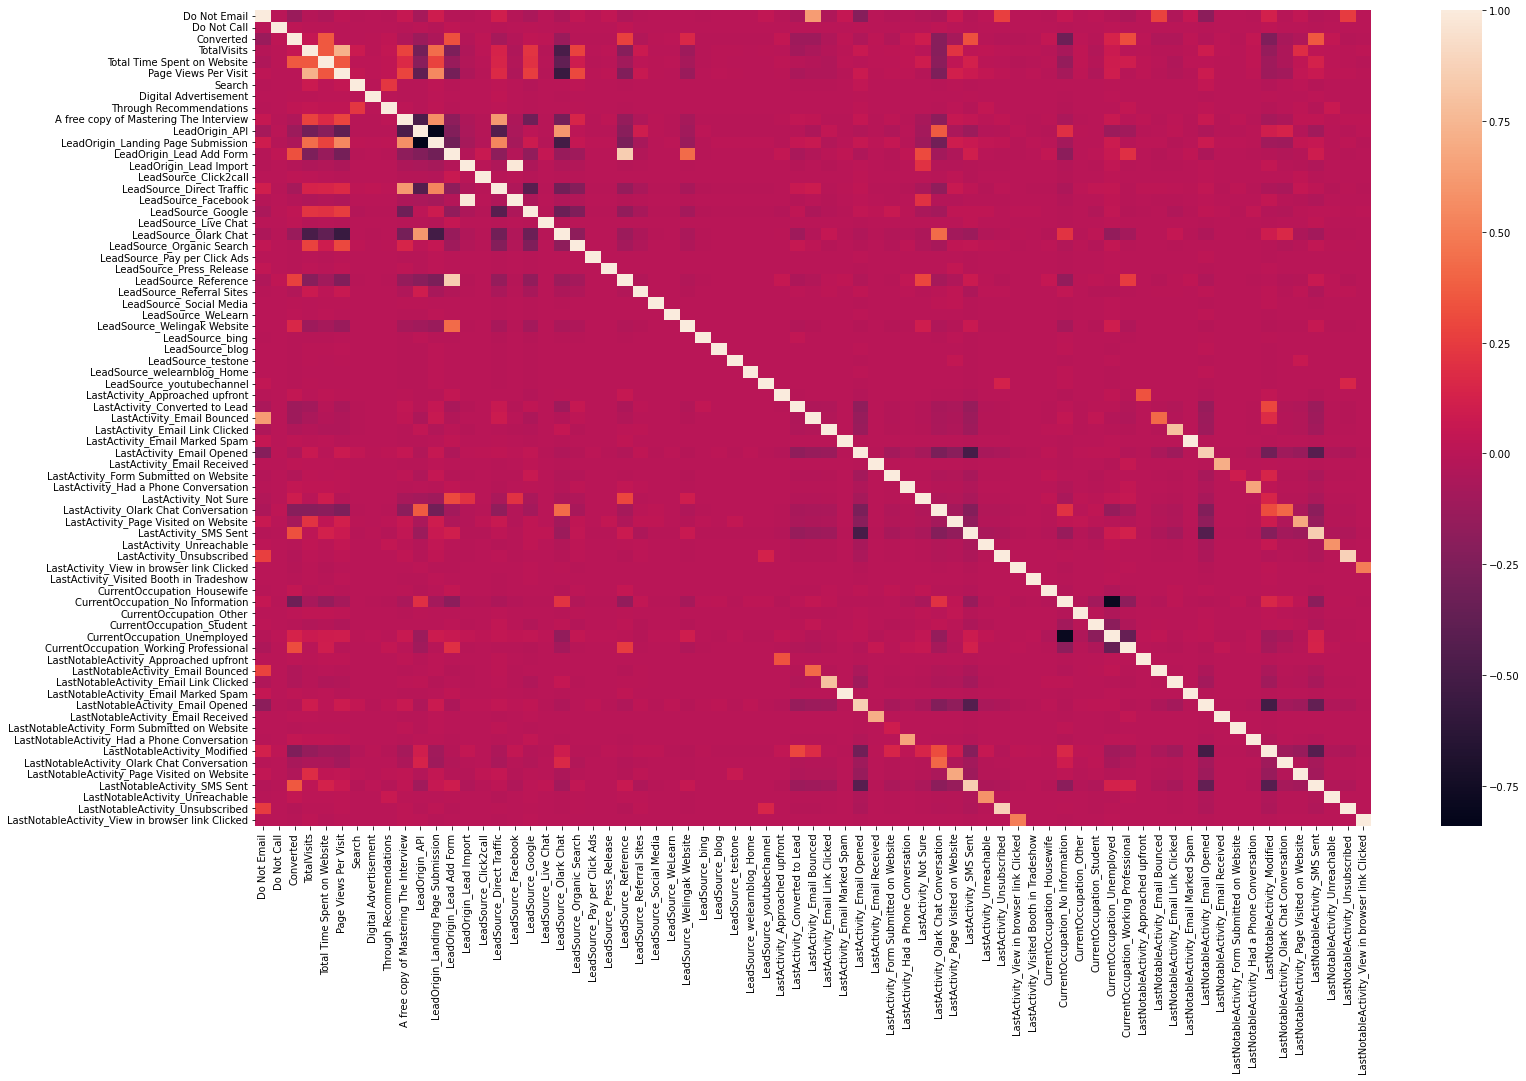

In [69]:
# Looking at the correlation table

plt.figure(figsize = (25,15))
sns.heatmap(lead.corr())
plt.show()

## Step 5 - Test-Train Split

In [70]:
# Putting feature variable to X

X = lead.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [71]:
# Putting response variable to y

y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 6 - MinMax Scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
5493,0,0,0.1250,0.042254,0.250,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8064,0,0,0.1875,0.041373,0.375,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4716,1,0,0.1875,0.099032,0.375,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9117,0,0,0.0000,0.000000,0.000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2402,0,0,0.3750,0.381162,0.250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
### Checking the Conversion Rate percentage

converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

38.50924797873519

### We have almost 39% conversion rate

## Step 7 - Model Building

#### Assessing the model with StatsModels

### Running the Initial Training Model

In [75]:
import statsmodels.api as sm

In [76]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 19 Mar 2023   Deviance:                   1.3701e+05
Time:                        17:23:21   Pearson chi2:                 6.70e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             8.644e+15   8.03e+07   1.08e+08      0.000    8.64e+15    8.64e+15
Do Not Email                                     -5.757e+14   4.55e+06  -1.27e+08      0.000   -5.76e+14   -5.76e+14
Do Not Call                                       4.372e+06      0.037   1.18e+08      0.000    4.37e+06    4.37e+06
TotalVisits                                       2.787e+14    4.8e+06    5.8e+07      0.000    2.79e+14    2.79e+14
Total Time Spent on Website                       3.336e+13   3.77e+06   8.86e+06      0.000    3.34e+13    3.34e+13
Page Views Per Visit                             -1.636e+14   5.69e+06  -2.88e+07      0.000   -1.64e+14   -1.64e+14
Search                                           -8.869e+14   2.13e+07  -4.16e+07      0.000   -8.87e+14   -8.87e+14
Digital Advertisement                             5.637e+15   6.72e+07   8.39e+07      0.000    5.64e+15    5.64e+15
Through Recommendations                           1.647e+14   3.39e+07   4.86e+06      0.000    1.65e+14    1.65e+14
A free copy of Mastering The Interview            1.496e+14   2.04e+06   7.35e+07      0.000     1.5e+14     1.5e+14
LeadOrigin_API                                    2.156e+15   2.23e+07   9.67e+07      0.000    2.16e+15    2.16e+15
LeadOrigin_Landing Page Submission                 1.93e+15   2.23e+07   8.65e+07      0.000    1.93e+15    1.93e+15
LeadOrigin_Lead Add Form                          2.903e+15   2.45e+07   1.19e+08      0.000     2.9e+15     2.9e+15
LeadOrigin_Lead Import                            1.654e+15   4.33e+07   3.82e+07      0.000    1.65e+15    1.65e+15
LeadSource_Click2call                            -3.028e+15   7.86e+07  -3.85e+07      0.000   -3.03e+15   -3.03e+15
LeadSource_Direct Traffic                        -3.403e+15   6.72e+07  -5.07e+07      0.000    -3.4e+15    -3.4e+15
LeadSource_Facebook                               -4.22e+15   8.25e+07  -5.12e+07      0.000   -4.22e+15   -4.22e+15
LeadSource_Google                                 -3.36e+15   6.72e+07     -5e+07      0.000   -3.36e+15   -3.36e+15
LeadSource_Live Chat                              1.798e+15   8.33e+07   2.16e+07      0.000     1.8e+15     1.8e+15
LeadSource_Olark Chat                            -2.828e+15   6.72e+07  -4.21e+07      0.000   -2.83e+15   -2.83e+15
LeadSource_Organic Search                        -3.678e+15   6.72e+07  -5.47e+07      0.000   -3.68e+15   -3.68e+15
LeadSource_Pay per Click Ads                       -85.8757   2.32e-06  -3.69e+07      0.000     -85.876     -85.876
LeadSource_Press_Release                         -2.592e+15   9.52e+07  -2.72e+07      0.000   -2.59e+15   -2.59e+15
LeadSource_Reference                     

## Step 8 - Feature Selection Using RFE

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [78]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe=RFE(estimator=logreg, n_features_to_select=20)
rfe.fit(X_train, y_train)



RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [79]:
rfe.support_

array([ True, False,  True,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False, False])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 51),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Search', False, 32),
 ('Digital Advertisement', False, 21),
 ('Through Recommendations', False, 7),
 ('A free copy of Mastering The Interview', False, 46),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 27),
 ('LeadSource_Click2call', False, 15),
 ('LeadSource_Direct Traffic', False, 11),
 ('LeadSource_Facebook', False, 10),
 ('LeadSource_Google', False, 14),
 ('LeadSource_Live Chat', False, 40),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 12),
 ('LeadSource_Pay per Click Ads', False, 49),
 ('LeadSource_Press_Release', False, 45),
 ('LeadSource_Reference', False, 31),
 ('LeadSource_Referral Sites', False, 13),
 ('LeadSource_Social Media', False, 16),
 ('LeadSource_WeLearn', False, 24),

In [81]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Not Sure', 'LastActivity_Olark Chat Conversation',
       'LastActivity_SMS Sent', 'CurrentOccupation_Housewife',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

### Rebuilding Model

### Model 2

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.8
Date:                Sun, 19 Mar 2023   Deviance:                       5041.5
Time:                        17:23:28   Pearson chi2:                 6.40e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4125
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2843      0.425     -3.021      0.003      -2.118      -0.451
Do Not Email                                    -1.1494      0.172     -6.690      0.000      -1.486      -0.813
TotalVisits                                      1.1814      0.250      4.730      0.000       0.692       1.671
Total Time Spent on Website                      4.6125      0.172     26.795      0.000       4.275       4.950
LeadOrigin_API                                  -0.6597      0.433     -1.522      0.128      -1.509       0.190
LeadOrigin_Landing Page Submission              -1.0385      0.430     -2.414      0.016      -1.882      -0.195
LeadOrigin_Lead Add Form                         2.9774      0.456      6.534      0.000       2.084       3.871
LeadSource_Olark Chat                            1.3924      0.136     10.250      0.000       1.126       1.659
LeadSource_Welingak Website                      2.0949      0.745      2.813      0.005       0.635       3.555
LastActivity_Approached upfront                 23.0811   2.44e+04      0.001      0.999   -4.77e+04    4.78e+04
LastActivity_Not Sure                           -1.3958      0.441     -3.162      0.002      -2.261      -0.531
LastActivity_Olark Chat Conversation            -0.8304      0.196     -4.247      0.000      -1.214      -0.447
LastActivity_SMS Sent                            1.2546      0.078     16.099      0.000       1.102       1.407
CurrentOccupation_Housewife                     24.1041   2.76e+04      0.001      0.999    -5.4e+04    5.41e+04
CurrentOccupation_No Information                -1.1947      0.089    -13.382      0.000      -1.370      -1.020
CurrentOccupation_Working Professional           2.3766      0.182     13.039      0.000       2.019       2.734
LastNotableActivity_Had a Phone Conversation     3.3534      1.135      2.955      0.003       1.129       5.578
LastNotableActivity_Modified                    -0.8338      0.087     -9.565      0.000      -1.005      -0.663
LastNotableActivity_Olark Chat Conversation     -0.5677      0.375     -1.516      0.130      -1.302       0.166
LastNotableActivity_Page Visited on Website     -0.5222      0.214     -2.443      0.015      -0.941      -0.103
LastNotableActivity_Unreachable                  1.6201      0.556      2.914      0.004       0.531       2.710
================================================================================================================
"""

#### Removing column LastActivity_Approached_Upfront as it has a high pvalue and hence is insignificant

In [83]:
col = col.drop('LastActivity_Approached upfront',1)

### Model 3

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.1
Date:                Sun, 19 Mar 2023   Deviance:                       5048.2
Time:                        17:23:29   Pearson chi2:                 6.41e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2857      0.425     -3.024      0.002      -2.119      -0.452
Do Not Email                                    -1.1536      0.172     -6.715      0.000      -1.490      -0.817
TotalVisits                                      1.1837      0.250      4.740      0.000       0.694       1.673
Total Time Spent on Website                      4.6207      0.172     26.854      0.000       4.283       4.958
LeadOrigin_API                                  -0.6621      0.433     -1.528      0.127      -1.512       0.187
LeadOrigin_Landing Page Submission              -1.0384      0.430     -2.414      0.016      -1.881      -0.195
LeadOrigin_Lead Add Form                         2.9873      0.456      6.558      0.000       2.094       3.880
LeadSource_Olark Chat                            1.4025      0.136     10.329      0.000       1.136       1.669
LeadSource_Welingak Website                      2.0858      0.745      2.801      0.005       0.626       3.546
LastActivity_Not Sure                           -1.4164      0.441     -3.209      0.001      -2.281      -0.551
LastActivity_Olark Chat Conversation            -0.8448      0.195     -4.324      0.000      -1.228      -0.462
LastActivity_SMS Sent                            1.2517      0.078     16.063      0.000       1.099       1.404
CurrentOccupation_Housewife                     23.0991   1.67e+04      0.001      0.999   -3.28e+04    3.28e+04
CurrentOccupation_No Information                -1.1991      0.089    -13.434      0.000      -1.374      -1.024
CurrentOccupation_Working Professional           2.3727      0.182     13.021      0.000       2.016       2.730
LastNotableActivity_Had a Phone Conversation     3.3546      1.135      2.955      0.003       1.130       5.579
LastNotableActivity_Modified                    -0.8223      0.087     -9.459      0.000      -0.993      -0.652
LastNotableActivity_Olark Chat Conversation     -0.5568      0.375     -1.486      0.137      -1.291       0.177
LastNotableActivity_Page Visited on Website     -0.5233      0.214     -2.447      0.014      -0.943      -0.104
LastNotableActivity_Unreachable                  1.6203      0.556      2.913      0.004       0.530       2.710
================================================================================================================
"""

#### Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

In [85]:
col = col.drop('CurrentOccupation_Housewife',1)

### Model 4

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.5
Date:                Sun, 19 Mar 2023   Deviance:                       5059.0
Time:                        17:23:29   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4109
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2801      0.425     -3.012      0.003      -2.113      -0.447
Do Not Email                                    -1.1576      0.172     -6.741      0.000      -1.494      -0.821
TotalVisits                                      1.1695      0.249      4.688      0.000       0.680       1.658
Total Time Spent on Website                      4.6182      0.172     26.873      0.000       4.281       4.955
LeadOrigin_API                                  -0.6584      0.433     -1.520      0.129      -1.508       0.191
LeadOrigin_Landing Page Submission              -1.0296      0.430     -2.395      0.017      -1.872      -0.187
LeadOrigin_Lead Add Form                         2.9917      0.455      6.570      0.000       2.099       3.884
LeadSource_Olark Chat                            1.3977      0.136     10.302      0.000       1.132       1.664
LeadSource_Welingak Website                      2.0798      0.745      2.793      0.005       0.620       3.539
LastActivity_Not Sure                           -1.4210      0.441     -3.220      0.001      -2.286      -0.556
LastActivity_Olark Chat Conversation            -0.8478      0.195     -4.340      0.000      -1.231      -0.465
LastActivity_SMS Sent                            1.2449      0.078     15.991      0.000       1.092       1.397
CurrentOccupation_No Information                -1.2027      0.089    -13.482      0.000      -1.378      -1.028
CurrentOccupation_Working Professional           2.3665      0.182     12.992      0.000       2.010       2.724
LastNotableActivity_Had a Phone Conversation     3.3466      1.135      2.949      0.003       1.122       5.571
LastNotableActivity_Modified                    -0.8227      0.087     -9.477      0.000      -0.993      -0.653
LastNotableActivity_Olark Chat Conversation     -0.5563      0.374     -1.485      0.137      -1.290       0.178
LastNotableActivity_Page Visited on Website     -0.5275      0.214     -2.467      0.014      -0.947      -0.108
LastNotableActivity_Unreachable                  1.6140      0.556      2.902      0.004       0.524       2.704
================================================================================================================
"""

#### Removing column LastNotableActivity_Had a Phone Conversationas it has high pvalue and hence is insignificant

In [87]:
col = col.drop('LastNotableActivity_Had a Phone Conversation',1)

### Model 5

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.7
Date:                Sun, 19 Mar 2023   Deviance:                       5073.3
Time:                        17:23:29   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4095
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -1.2715      0.425     -2.994      0.003      -2.104      -0.439
Do Not Email                                   -1.1612      0.172     -6.767      0.000      -1.498      -0.825
TotalVisits                                     1.1917      0.249      4.793      0.000       0.704       1.679
Total Time Spent on Website                     4.6048      0.171     26.859      0.000       4.269       4.941
LeadOrigin_API                                 -0.6521      0.433     -1.506      0.132      -1.501       0.196
LeadOrigin_Landing Page Submission             -1.0236      0.430     -2.382      0.017      -1.866      -0.181
LeadOrigin_Lead Add Form                        2.9915      0.455      6.572      0.000       2.099       3.884
LeadSource_Olark Chat                           1.3904      0.135     10.264      0.000       1.125       1.656
LeadSource_Welingak Website                     2.0791      0.745      2.792      0.005       0.619       3.539
LastActivity_Not Sure                          -1.4191      0.441     -3.217      0.001      -2.284      -0.555
LastActivity_Olark Chat Conversation           -0.8479      0.195     -4.342      0.000      -1.231      -0.465
LastActivity_SMS Sent                           1.2326      0.078     15.863      0.000       1.080       1.385
CurrentOccupation_No Information               -1.2042      0.089    -13.515      0.000      -1.379      -1.030
CurrentOccupation_Working Professional          2.3583      0.182     12.952      0.000       2.001       2.715
LastNotableActivity_Modified                   -0.8324      0.087     -9.602      0.000      -1.002      -0.662
LastNotableActivity_Olark Chat Conversation    -0.5664      0.374     -1.513      0.130      -1.300       0.167
LastNotableActivity_Page Visited on Website    -0.5451      0.214     -2.551      0.011      -0.964      -0.126
LastNotableActivity_Unreachable                 1.5988      0.556      2.875      0.004       0.509       2.689
===============================================================================================================
"""

#### Removing column LeadOrigin_API as it has high pvalue and hence insignificant

In [89]:
col = col.drop('LeadOrigin_API',1)

### Model 6

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.7
Date:                Sun, 19 Mar 2023   Deviance:                       5075.4
Time:                        17:23:29   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4093
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -1.8913      0.118    -15.987      0.000      -2.123      -1.659
Do Not Email                                   -1.1609      0.171     -6.775      0.000      -1.497      -0.825
TotalVisits                                     1.1589      0.248      4.682      0.000       0.674       1.644
Total Time Spent on Website                     4.5850      0.171     26.852      0.000       4.250       4.920
LeadOrigin_Landing Page Submission             -0.3886      0.091     -4.261      0.000      -0.567      -0.210
LeadOrigin_Lead Add Form                        3.5903      0.230     15.613      0.000       3.140       4.041
LeadSource_Olark Chat                           1.3600      0.134     10.174      0.000       1.098       1.622
LeadSource_Welingak Website                     2.0794      0.744      2.794      0.005       0.620       3.538
LastActivity_Not Sure                          -1.2905      0.448     -2.883      0.004      -2.168      -0.413
LastActivity_Olark Chat Conversation           -0.8547      0.195     -4.381      0.000      -1.237      -0.472
LastActivity_SMS Sent                           1.2318      0.078     15.856      0.000       1.080       1.384
CurrentOccupation_No Information               -1.2046      0.089    -13.527      0.000      -1.379      -1.030
CurrentOccupation_Working Professional          2.3571      0.182     12.948      0.000       2.000       2.714
LastNotableActivity_Modified                   -0.8300      0.087     -9.583      0.000      -1.000      -0.660
LastNotableActivity_Olark Chat Conversation    -0.5587      0.374     -1.494      0.135      -1.291       0.174
LastNotableActivity_Page Visited on Website    -0.5426      0.213     -2.543      0.011      -0.961      -0.124
LastNotableActivity_Unreachable                 1.5936      0.556      2.868      0.004       0.505       2.683
===============================================================================================================
"""

#### Removing column LastNotableActivity_Olark Chat Conversation as it has high pvalue and hence is insignificant

In [91]:
col = col.drop('LastNotableActivity_Olark Chat Conversation',1)

### Model 7

In [92]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.9
Date:                Sun, 19 Mar 2023   Deviance:                       5077.7
Time:                        17:23:29   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4091
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -1.8939      0.118    -16.016      0.000      -2.126      -1.662
Do Not Email                                   -1.1637      0.171     -6.803      0.000      -1.499      -0.828
TotalVisits                                     1.1520      0.247      4.659      0.000       0.667       1.637
Total Time Spent on Website                     4.5715      0.170     26.831      0.000       4.238       4.905
LeadOrigin_Landing Page Submission             -0.3888      0.091     -4.267      0.000      -0.567      -0.210
LeadOrigin_Lead Add Form                        3.5791      0.230     15.582      0.000       3.129       4.029
LeadSource_Olark Chat                           1.3591      0.134     10.163      0.000       1.097       1.621
LeadSource_Welingak Website                     2.0678      0.744      2.780      0.005       0.610       3.526
LastActivity_Not Sure                          -1.3039      0.447     -2.917      0.004      -2.180      -0.428
LastActivity_Olark Chat Conversation           -1.0102      0.171     -5.912      0.000      -1.345      -0.675
LastActivity_SMS Sent                           1.2346      0.078     15.911      0.000       1.082       1.387
CurrentOccupation_No Information               -1.2098      0.089    -13.596      0.000      -1.384      -1.035
CurrentOccupation_Working Professional          2.3569      0.182     12.941      0.000       2.000       2.714
LastNotableActivity_Modified                   -0.7982      0.084     -9.535      0.000      -0.962      -0.634
LastNotableActivity_Page Visited on Website    -0.5310      0.213     -2.492      0.013      -0.949      -0.113
LastNotableActivity_Unreachable                 1.6032      0.555      2.886      0.004       0.515       2.692
===============================================================================================================
"""

#### Since the Model 7 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [93]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.060446
8064    0.092212
4716    0.027895
9117    0.369405
2402    0.472983
1796    0.027844
1120    0.027844
253     0.051432
1491    0.124955
2004    0.337440
dtype: float64

In [94]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06044589, 0.09221234, 0.02789497, 0.36940514, 0.47298269,
       0.02784436, 0.02784436, 0.05143166, 0.12495452, 0.33744025])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [95]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.060446,5493
1,0,0.092212,8064
2,0,0.027895,4716
3,0,0.369405,9117
4,1,0.472983,2402


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [96]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.060446,5493,0
1,0,0.092212,8064,0
2,0,0.027895,4716,0
3,0,0.369405,9117,0
4,1,0.472983,2402,0


#### Lets check the confusion metrics and accuracy

In [97]:
from sklearn import metrics

In [98]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3476  433]
 [ 720 1691]]


In [99]:
# Predicted     not_converted    converted
# Actual
# not_converted        3476      433
# converted            720       1691

In [100]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8175632911392405


#### Accuracy rate is around 82% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics

### Checking VIFs

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.84
3,LeadOrigin_Landing Page Submission,2.71
2,Total Time Spent on Website,2.09
12,LastNotableActivity_Modified,1.80
4,LeadOrigin_Lead Add Form,1.64
5,LeadSource_Olark Chat,1.63
8,LastActivity_Olark Chat Conversation,1.63
9,LastActivity_SMS Sent,1.54
10,CurrentOccupation_No Information,1.54
6,LeadSource_Welingak Website,1.29


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

#### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7013687266694317

In [104]:
# Let us calculate specificity

TN / float(TN+FP)

0.8892299820926068

In [105]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.1107700179073932


In [106]:
# positive predictive value 

print (TP / float(TP+FP))

0.7961393596986818


In [107]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8284080076263107


### Step 9 - Plotting the ROC Curve

### An ROC curve demonstrates several things:

#### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
#### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
#### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

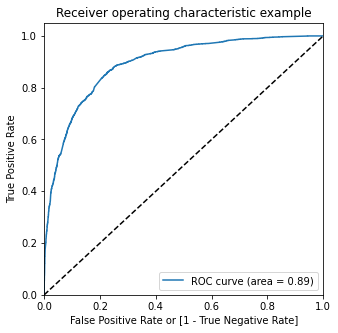

In [110]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 10 - Finding Optimal Cutoff Point

### Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [111]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.060446,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.092212,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.027895,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.369405,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.472983,2402,0,1,1,1,1,1,0,0,0,0,0


In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.642722  0.968893  0.441545
0.2   0.2  0.759177  0.917047  0.661806
0.3   0.3  0.801582  0.870178  0.759273
0.4   0.4  0.813133  0.771464  0.838833
0.5   0.5  0.817563  0.701369  0.889230
0.6   0.6  0.807753  0.628785  0.918138
0.7   0.7  0.788291  0.525923  0.950115
0.8   0.8  0.762816  0.429282  0.968534
0.9   0.9  0.717089  0.278723  0.987465


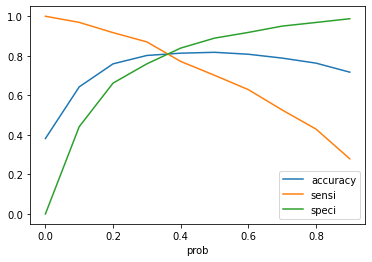

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [114]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.060446,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.092212,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.027895,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.369405,9117,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.472983,2402,0,1,1,1,1,1,0,0,0,0,0,1


In [115]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.060446,5493,0,1,0,0,0,0,0,0,0,0,0,0,6
1,0,0.092212,8064,0,1,0,0,0,0,0,0,0,0,0,0,9
2,0,0.027895,4716,0,1,0,0,0,0,0,0,0,0,0,0,3
3,0,0.369405,9117,0,1,1,1,1,0,0,0,0,0,0,0,37
4,1,0.472983,2402,0,1,1,1,1,1,0,0,0,0,0,1,47
5,0,0.027844,1796,0,1,0,0,0,0,0,0,0,0,0,0,3
6,0,0.027844,1120,0,1,0,0,0,0,0,0,0,0,0,0,3
7,0,0.051432,253,0,1,0,0,0,0,0,0,0,0,0,0,5
8,0,0.124955,1491,0,1,1,0,0,0,0,0,0,0,0,0,12
9,1,0.337440,2004,0,1,1,1,1,0,0,0,0,0,0,0,34


In [116]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1934
0     477
Name: final_predicted, dtype: int64

In [117]:
# check the precentage of final_predicted conversions

1934/float(1934+477)

0.8021567814184986

#### Hence we can see that the final prediction of conversions have a target of 80%  conversion as per the X Educations CEO's requirement . Hence this is a good model.

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [118]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8129746835443038

In [119]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3204,  705],
       [ 477, 1934]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8021567814184986

In [122]:
# Let us calculate specificity

TN / float(TN+FP)

0.819646968534152

In [123]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.18035303146584805


In [124]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7328533535430087


In [125]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8704156479217604


#### Metrics - Precision and Recall

In [126]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3476,  433],
       [ 720, 1691]], dtype=int64)

In [127]:
from sklearn.metrics import precision_score, recall_score

In [128]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7961393596986818

In [129]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7013687266694317

### Precision and recall tradeoff

In [130]:
from sklearn.metrics import precision_recall_curve

In [131]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [132]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

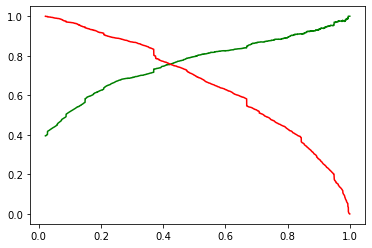

In [133]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11 - Making predictions on the test set

In [134]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [135]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Modified,LastNotableActivity_Page Visited on Website,LastNotableActivity_Unreachable
4664,0,0.0000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0
5394,0,0.2500,0.072183,0,0,1,0,0,0,0,1,0,1,0,0
1595,0,0.2500,0.515405,1,0,0,0,0,0,0,0,1,1,0,0
2111,0,0.4375,0.229754,1,0,0,0,0,0,0,1,0,0,0,0
9182,0,0.0000,0.000000,0,0,1,0,0,0,1,0,0,1,0,0


In [136]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [137]:
y_test_pred = res.predict(X_test_sm)

In [138]:
y_test_pred[:10]

4664    0.369405
5394    0.127337
1595    0.872170
2111    0.125855
9182    0.475430
1055    0.657343
541     0.102761
446     0.988777
3728    0.016788
4249    0.007362
dtype: float64

In [139]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [140]:
# Let's see the head

y_pred_1.head()

,0
4664,0.369405
5394,0.127337
1595,0.872170
2111,0.125855
9182,0.475430


In [141]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [142]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [143]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [144]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [145]:
y_pred_final.head()

,Converted,LeadId,0
0,0,4664,0.369405
1,0,5394,0.127337
2,1,1595,0.872170
3,0,2111,0.125855
4,0,9182,0.475430


In [146]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [147]:
# Rearranging the columns

y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,0,4664,0.369405
1,0,5394,0.127337
2,1,1595,0.872170
3,0,2111,0.125855
4,0,9182,0.475430


In [148]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [149]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,0,4664,0.369405,0
1,0,5394,0.127337,0
2,1,1595,0.872170,1
3,0,2111,0.125855,0
4,0,9182,0.475430,1


In [150]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,0,4664,0.369405,0,37
1,0,5394,0.127337,0,13
2,1,1595,0.872170,1,87
3,0,2111,0.125855,0,13
4,0,9182,0.475430,1,48
5,1,1055,0.657343,1,66
6,0,541,0.102761,0,10
7,1,446,0.988777,1,99
8,0,3728,0.016788,0,2
9,0,4249,0.007362,0,1


In [151]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    867
0    199
Name: final_predicted, dtype: int64

In [152]:
# check the precentage of final_predicted conversions on test data

867/float(867+199)

0.8133208255159474

#### Hence we can see that the final prediction of conversions have a target rate of 81% (81.33%) 

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set0

In [153]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8146917681801402

In [154]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1340,  303],
       [ 199,  867]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8133208255159474

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.815581253804017

#### Precision and Recall metrics for the test set

In [158]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7410256410256411
recall  0.8133208255159474


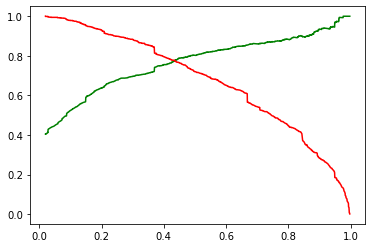

In [159]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good. 